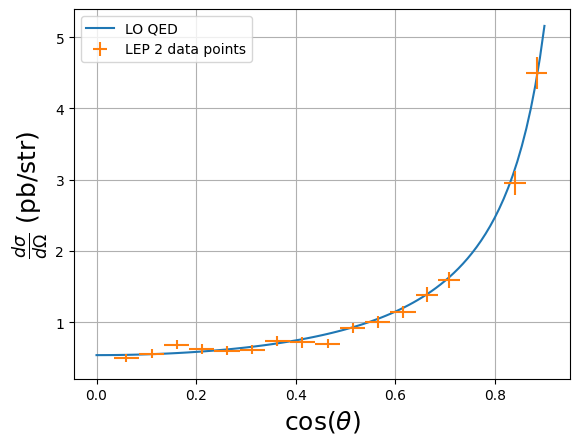

In [4]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
m = 0.511e-3 #MeV
alpha =0.0072973525643 
pi = math.pi
p2nr = lambda e: e**2 - m**2
p2 = lambda e: e**2 
f_in = lambda E,ctheta: (3*m**2 + p2nr(E)*(ctheta**2+3))/(p2nr(E) *(1-ctheta**2) + m**2) - ((p2nr(E)*(1-ctheta**2) - m**2)/(p2nr(E)*(1-ctheta**2)+m**2))**2
#f_in = lambda E,ctheta: (3*m**2 + E*(ctheta**2+3))/(E*(1-ctheta**2) + m**2) - ((E*(1-ctheta**2) - m**2)/(E*(1-ctheta**2)+m**2))**2
f_ur = lambda ctheta: (1+ctheta**2)/(1-ctheta**2)
sigma = lambda E, ctheta: alpha**2 / (8*E**2 ) *f_in(E,ctheta)
sigma_ur = lambda E, ctheta: alpha**2 / (4*E**2) *f_ur(ctheta) 

E_given = 195.6/2 /math.sqrt(0.389 *10**(9)) #pb -1
#E_given = 1/2 #MeV
ctheta_points = [
    (0.0350, 0.0855), (0.0855, 0.1360), (0.1360, 0.1865), (0.1865, 0.2370),
    (0.2370, 0.2875), (0.2875, 0.3380), (0.3380, 0.3885), (0.3885, 0.4390),
    (0.4390, 0.4895), (0.4895, 0.5400), (0.5400, 0.5905), (0.5905, 0.6410),
    (0.6410, 0.6860), (0.6860, 0.7310), (0.8190, 0.8625), (0.8625, 0.9060)
]
dsigma_tuples = [
    (0.50, 0.05, 0.02), (0.56, 0.06, 0.02), (0.69, 0.06, 0.02), (0.63, 0.06, 0.03),
    (0.60, 0.06, 0.02), (0.62, 0.06, 0.02), (0.74, 0.07, 0.02), (0.72, 0.07, 0.02),
    (0.70, 0.06, 0.02), (0.92, 0.07, 0.02), (1.01, 0.08, 0.02), (1.15, 0.08, 0.02),
    (1.39, 0.10, 0.03), (1.59, 0.11, 0.03), (2.95, 0.16, 0.05), (4.50, 0.21, 0.08)
]


dsigma = []

ctheta_range = np.linspace(0,0.9,100)
sigma_range = []
for i in ctheta_range:
    sigma_range.append(sigma_ur(E_given, i))

x = [(tup[0] + tup[1])/2 for tup in ctheta_points]
y = [tup[0] for tup in dsigma_tuples]

err_x = [(tup[1]-tup[0])/2 for tup in ctheta_points]
err_y =[(tup[1]**2+tup[2]**2)**(1/2) for tup in dsigma_tuples]

plt.plot(ctheta_range, sigma_range)
plt.errorbar(x,y,yerr=err_y,xerr=err_x,fmt=',')

plt.xlabel(r'$\cos(\theta)$', fontsize=18)
plt.ylabel(r'$\frac{d\sigma}{d\Omega}$ (pb/str)', fontsize=18)
plt.legend(['LO QED', 'LEP 2 data points'])
plt.grid(True)
plt.savefig("qed1.pdf", format="pdf", bbox_inches="tight")

[161.3, 172.0, 182.7, 188.6, 191.6, 195.5, 199.5, 201.6, 205.7, 206.3]


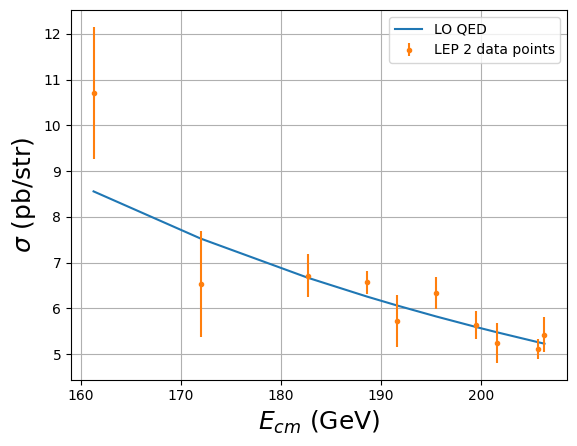

In [5]:
ECM= [161.3, 172.,  182.7, 188.6, 191.6, 195.5, 199.5, 201.6, 205.7,206.3,]
Sigma= [10.71,  6.53,6.72,6.57,5.73,6.34,5.64,5.25,5.11,5.43,]
Sigma_Error1= [1.42, 1.14, 0.45, 0.25, 0.57, 0.34, 0.31, 0.43, 0.21, 0.38, ]
Sigma_Error2= [0.26, 0.19, 0.15, 0.07, 0.07, 0.07, 0.06, 0.06, 0.05, 0.07, ]

ctheta_min1 = 0.035
ctheta_max1 = 0.731
ctheta_min2 = 0.819
ctheta_max2 = 0.906
my_sigma_array = []
print(ECM)
for i in ECM:
   integrala = sp.integrate.quad(f_ur, ctheta_min1, ctheta_max1,)
   integral1 = 2*pi*integrala[0]
   integralb = sp.integrate.quad(f_ur, ctheta_min2, ctheta_max2,)
   integral2 = 2*pi*integralb[0]
   almost_there = alpha**2 / (i**2) *(integral1 + integral2)  * 0.389 *10**(9)
   my_sigma_array.append(almost_there)



err_y = []

for i in range(len(Sigma)):
    err_y.append((Sigma_Error1[i]**2 + Sigma_Error2[i]**2)**(1/2))
#
plt.plot(ECM, my_sigma_array)
plt.errorbar(ECM,Sigma,yerr=err_y,fmt='.')

plt.xlabel(r'$E_{cm}$ (GeV)', fontsize=18)
plt.ylabel(r'$\sigma$ (pb/str)', fontsize=18)
plt.legend(['LO QED', 'LEP 2 data points'])
plt.grid(True)
plt.savefig("qed2.pdf", format="pdf", bbox_inches="tight")